In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
%matplotlib inline

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print(train_data.shape, test_data.shape)
train_data.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#descriptive statistics summary
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

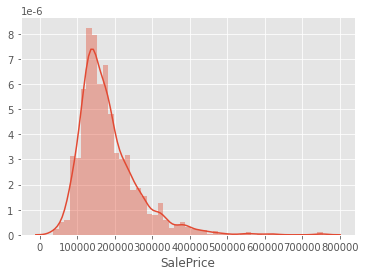

In [4]:
#histogram
sns.distplot(train_data['SalePrice'])

## Skewness
 
It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.
- 它是对称钟形曲线或正态分布引起的变形程度。 它可以测量数据分布中缺乏对称性的情况。它可以区分一条尾巴与另一条尾巴的极值。 对称分布的偏度为0。

There are two types of Skewness: **Positive and Negative**

<img src="https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" width="400" height="400" />

**Positive Skewness** means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.
- 正偏度是指分布右侧的尾巴更长或更胖。 平均值和中位数将大于众数。

**Negative Skewness** is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.
- 负偏度是分布左侧的尾巴比右侧的尾巴更长或更胖的时候。 平均值和中位数将小于众数。
***
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

## Kurtosis

**Kurtosis** is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.
- 峰度完全是分布的尾巴，而不是峰度或平坦度。 它用于描述一条尾巴相对于另一条尾巴的极值。 它实际上是分布中存在的异常值的度量。

**High kurtosis** in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. Investigate!
- 数据集中的高峰度是数据尾部或离群值较大的指示。 如果峰度很高，那么我们需要调查为什么会有这么多异常值。 它表明很多事情，也许是错误的数据输入或其他事情。 调查！

**Low kurtosis** in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.
- 数据集中的低峰度表示数据尾部较浅或没有异常值。 如果我们的峰度较低（太好了，难以置信），那么我们还需要调查并修剪不良结果的数据集。
<img src="https://bookdown.org/curleyjp0/psy317l_guides/img/kurtosis.png" alt="GitHub" title="GitHub,Social Coding" width="500" height="500" />
**Mesokurtic**: This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.
- 此分布具有与正态分布相似的峰度统计量。 这意味着分布的极值与正态分布特征的极值相似。 使用此定义是为了使标准正态分布的峰度为3。

**Leptokurtic** (Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers.
- 分布更长，尾巴更胖。 峰值比Mesokurtic更高且更尖锐，这意味着数据是重尾或离群值。

Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
- 离群值拉伸直方图的水平轴，这使得大部分数据显示在狭窄的（“皮包骨头”）垂直范围内，从而给出了轻薄分布的“倾斜度”。

**Platykurtic**: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
- 分布短，尾巴比正态分布细。 该峰比Mesokurtic峰更低且更宽，这意味着数据是轻尾的或没有异常值。

The reason for this is because the extreme values are less than that of the normal distribution.

In [5]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew()) #偏斜度
print("Kurtosis: %f" % train_data['SalePrice'].kurt()) #峰度
print("positively skewed\nLeptokurtic")

Skewness: 1.882876
Kurtosis: 6.536282
positively skewed
Leptokurtic


'\nxlim([xl xr]); ylim([yl yr]); 用于限定x轴 y轴上线限制.\n其中，xl：x轴下限 xr：x轴上限 yl：y轴下限 yr：y轴上限\n'

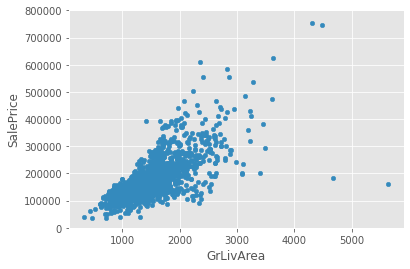

In [6]:
# GrLivArea: Above grade (ground) living area square feet 居住面积平方英尺
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))
"""
xlim([xl xr]); ylim([yl yr]); 用于限定x轴 y轴上线限制.
其中，xl：x轴下限 xr：x轴上限 yl：y轴下限 yr：y轴上限
"""

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

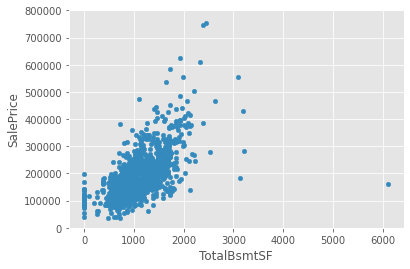

In [7]:
# TotalBsmtSF: Total square feet of basement area 地下室总面积
data = pd.concat([train_data['SalePrice'], train_data['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, 0.0, 800000.0)

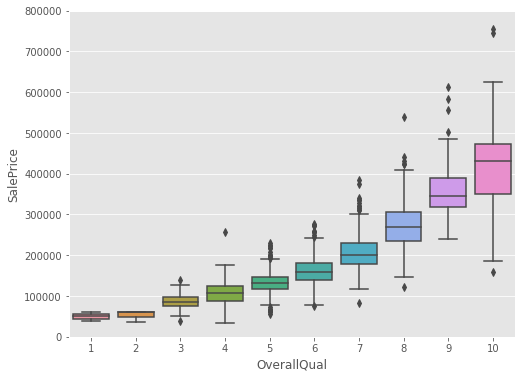

In [8]:
# OverallQual: Rates the overall material and finish of the house 评估房子的整体材料和装饰
data = pd.concat([train_data['SalePrice'], train_data['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)

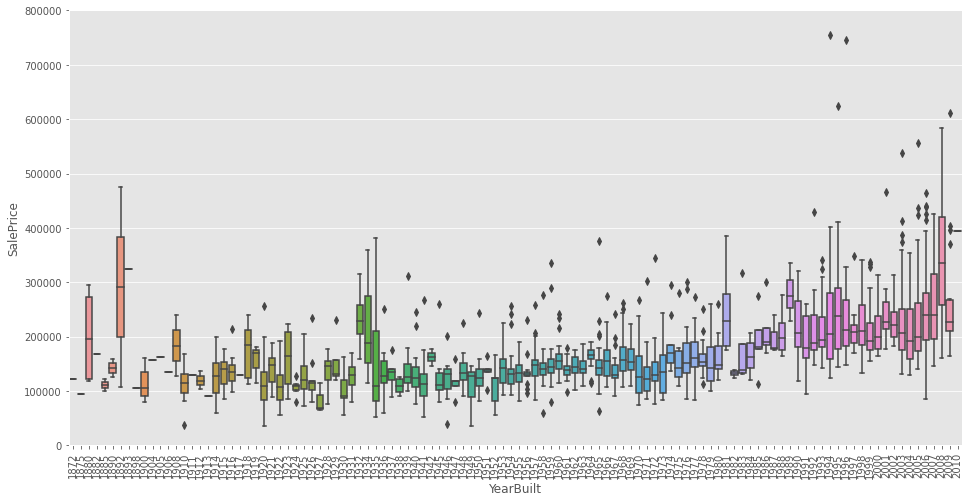

In [9]:
# YearBuilt: Original construction date 原始施工日期
data = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

<AxesSubplot:>

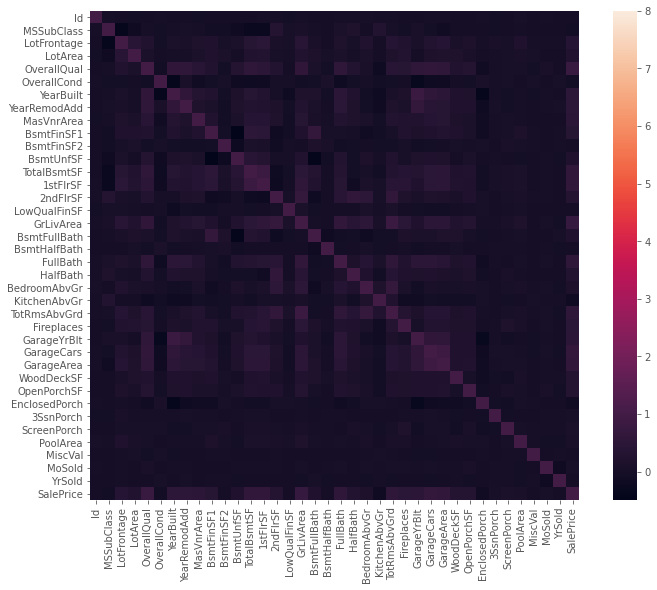

In [10]:
# Correlation Matrix
corrmat = train_data.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=8, square=True)

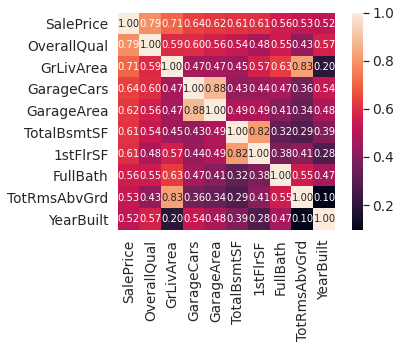

In [11]:
# Seleprice correlation matrix
k = 10 # number of varibles for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index  # the n largest correlation for SelePrice
cm = np.corrcoef(train_data[cols].values.T) # corrcoef函数（皮尔逊相关系数）
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot_kws={'size':10}, annot=True, 
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

- OverallQual: Rates the overall material and finish of the house 评估房子的整体材料和装饰
- GarageArea: Size of garage in square feet 车库面积(平方英尺)
- GarageCars: Size of garage in car capacity 车库的大小与汽车容量
- GrLivArea: Above grade (ground) living area square feet (地面)居住面积平方英尺
- TotalBsmtSF: Total square feet of basement area 地下室总面积
- 1stFlrSF: First Floor square feet 一楼平方英尺
- FullBath: Full bathrooms above grade 高档全浴室
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 楼层客房总数(不包括浴室)
- YearBuilt: Original construction date 原始施工日期

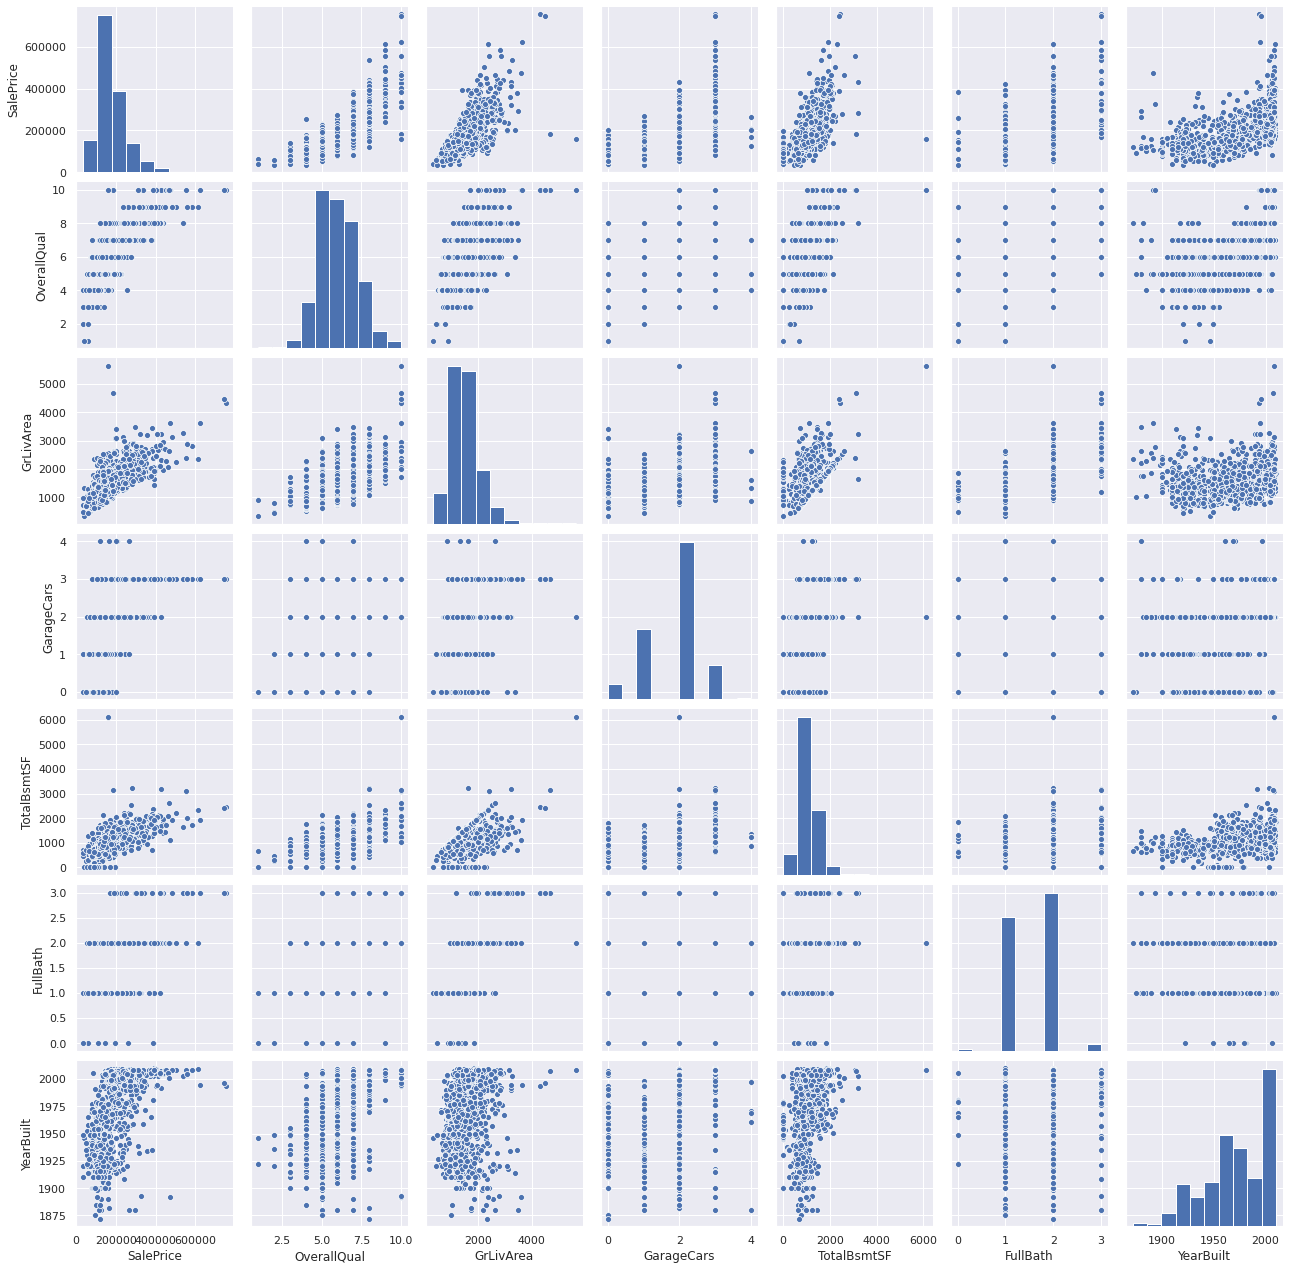

In [12]:
# scatter plots between 'SalePrice' and correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height=2.5)
plt.show()

In [13]:
# Missing Data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<span class="burk">PoolQC</span> <span class="burk">MiscFeature</span> <span class="burk">Alley</span> <span class="burk">Fence</span> <span class="burk">FireplaceQu</span>
These features shoule be drop

In [14]:
# dealing with missing data 
train_data = train_data.drop(missing_data[missing_data['Total']>1].index, 1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max() # check that there is no missing data

0

In [15]:
# outliars 离群值<==>异常值
# standardizing data
train_data['SalePrice'].mean()
# X_scaled = (X - X.mean()) / X.std() 其中： X.mean()为数据集的均值，X.std()为数据集的标准差
SS = StandardScaler().fit_transform(train_data['SalePrice'][:, np.newaxis]) # 标准差标准化（standardScale）

low_range = SS[SS[:,0].argsort()[:10]]
high_range = SS[SS[:,0].argsort()][-10:]
print('range(low) of the distribution')
print(low_range)
print('\norange(high of the distribution)')
print(high_range)

range(low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

orange(high of the distribution)
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


###### Bivariate analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

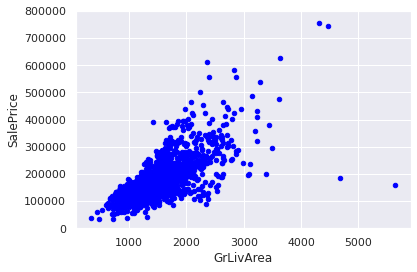

In [16]:
# GLivArea wrt SalePrice
# Above grade (ground) living area square feet (地面)居住面积平方英尺
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), color='blue')

In [17]:
# deleting outliars point
train_data.sort_values(by='GrLivArea', ascending=False)[:2] # ascending=False代表降序
train_data = train_data.drop(train_data[train_data['Id']==1299].index)
train_data = train_data.drop(train_data[train_data['Id']==524].index)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

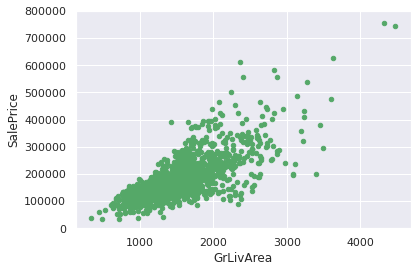

In [18]:
data = pd.concat([train_data['SalePrice'], train_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), color='g')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

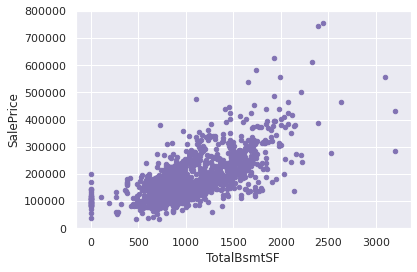

In [19]:
# bivariate analysis saleprice wrt totalbsmtsf
# Total square feet of basement area 地下室总面积
data = pd.concat([train_data['SalePrice'], train_data['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000), color='m')

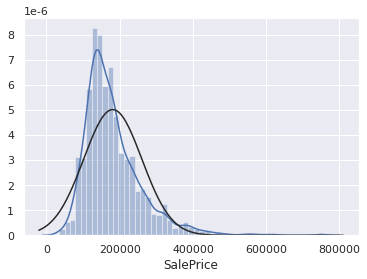

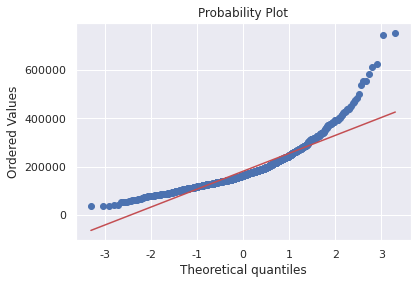

In [20]:
from scipy.stats import norm
from scipy import stats

# Histogram and normal probablity plot
sns.distplot(train_data['SalePrice'], fit=norm) # scipy库中stats对象的.probplot() 方法拟合一个高斯正态分布
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
# 红色线条表示正态分布，蓝色线条表示样本数据，蓝色越接近红色参考线，说明越符合预期分布（这是是正态分布）

In case of positive skewness, log transformations usually works well.

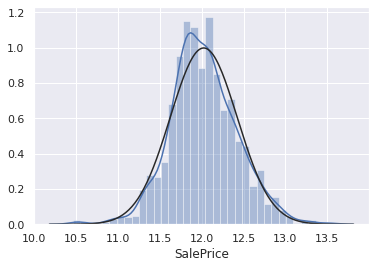

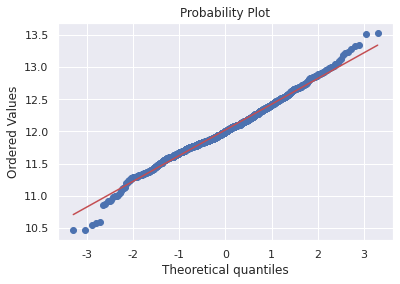

In [21]:
# applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])

sns.distplot(train_data['SalePrice'], fit=norm) 
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

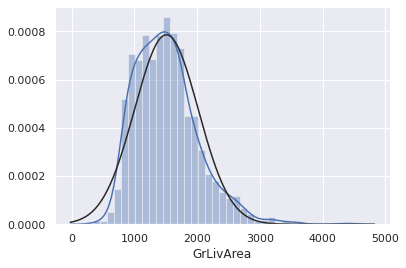

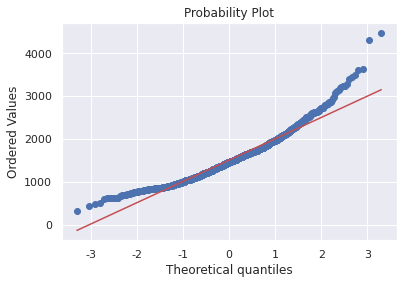

In [22]:
sns.distplot(train_data['GrLivArea'], fit=norm) 
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

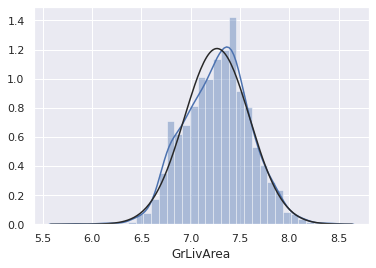

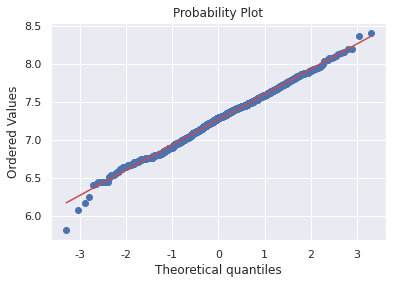

In [23]:
# applying log transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

sns.distplot(train_data['GrLivArea'], fit=norm) 
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

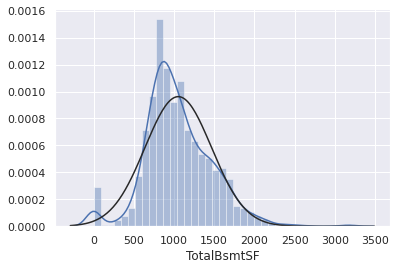

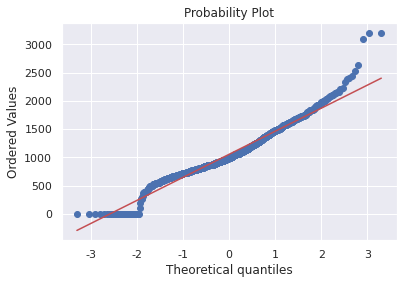

In [24]:
sns.distplot(train_data['TotalBsmtSF'], fit=norm) 
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

###### zero value is a big problem

In [25]:
# create column for new varable
# if area>0 it gets 1, for area==0 it gets 0
train_data['HesBsmt'] = pd.Series(len(train_data['TotalBsmtSF']),index=train_data.index)
train_data['HesBsmt'] = 0
train_data.loc[train_data['TotalBsmtSF']>0, 'HesBsmt'] = 1

In [26]:
# applying log transformation
train_data.loc[train_data['HesBsmt']==1, 'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

/home/zjd/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


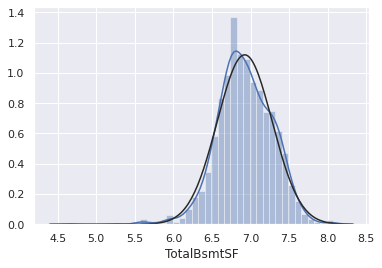

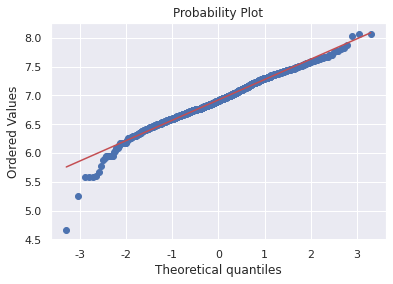

In [27]:
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm) 
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

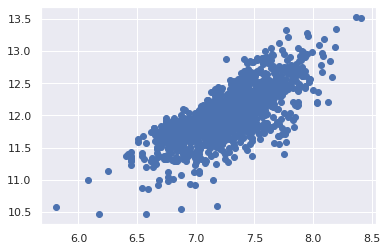

In [28]:
# scatter plot
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'])

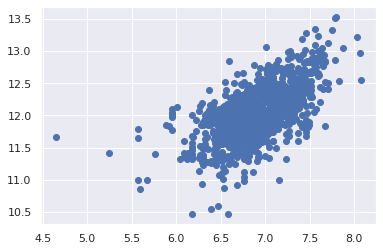

In [29]:
plt.scatter(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], 
            train_data[train_data['TotalBsmtSF']>0]['SalePrice'])

In [30]:
print(train_data.shape)
train_data = pd.get_dummies(train_data) # get_dummies 是利用pandas实现one hot encode的方式
print(train_data.shape)

(1457, 64)
(1457, 222)


# prediction